In [9]:
import pandas as pd #https://pandas.pydata.org/pandas-docs/stable/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/2.0.2/users/pyplot_tutorial.html


In [10]:
database.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
#We can see as a list which are the values of the columns, for which we will make the plot
database.columns.values.tolist()

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

## Scatterplot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

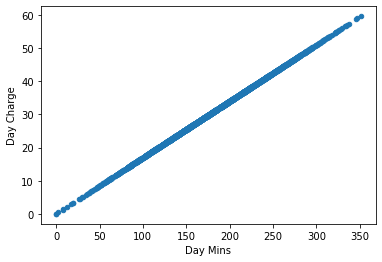

In [17]:
#One of the simplest is the scatterplot
database.plot(kind="scatter", x="Day Mins", y="Day Charge")

#We will see a basic plot, where we define which will be the variable in the x axis, and in the y axis

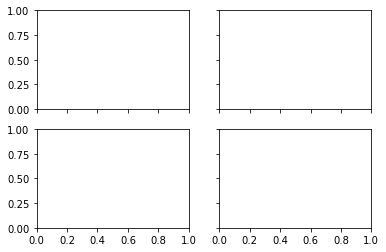

In [18]:
#WE can make a 2 x 2 matrix of plots
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
#Where we create the matrix of 2x2, and we say that both will share the same y and x axis

In [39]:
#Now we will make the plot inside of each box
database.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
database.plot(kind="scatter", x="Night Mins", y="Day Charge", ax=axs[0][1])
database.plot(kind="scatter", x="Day Mins", y="Night Charge", ax=axs[1][0])
database.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[1][1])

#Where the [0][0] represents the first box at the top right

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

## Frecuency Histogram

Text(0.5, 1.0, 'Histogram of number of calls per day')

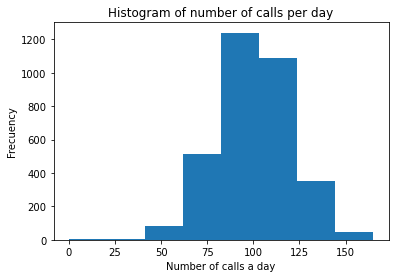

In [43]:
#We want to look for example of how the data is ditributed in a graphical way
plt.hist(database["Day Calls"], bins=8)
plt.xlabel("Number of calls a day")
plt.ylabel("Frecuency")
plt.title("Histogram of number of calls per day")


#Where the bins is the number of divisions in the x axis
#We could define our divisions putting: bins=[20,50,80,120,190] for example

#The xlabel and ylabel is to put the names of the respective labels
#The .title is to put the name of the title

In [44]:
database.shape

(3333, 21)

(array([  2.,   0.,   3.,  17.,  92., 261., 532., 809., 812., 495., 222.,
         80.,   8.]),
 array([  0.        ,  12.69230769,  25.38461538,  38.07692308,
         50.76923077,  63.46153846,  76.15384615,  88.84615385,
        101.53846154, 114.23076923, 126.92307692, 139.61538462,
        152.30769231, 165.        ]),
 <BarContainer object of 13 artists>)

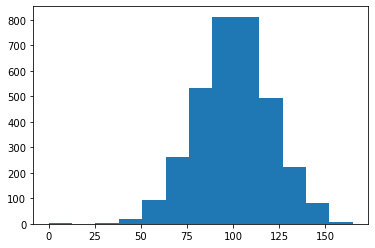

In [45]:
#Which should be the intervals?
#There is the Sturges law, which says that the number of intervals should be 1+log(M), there the log is of base 2
#and M is the size of the data
import numpy as np #We import numpy to do the computation, see https://numpy.org/

plt.hist(database["Day Calls"], bins=int(np.ceil(1+np.log2(3333))))
#Where the 3333 is the number of rows we have obtained in the shape

## Boxplot

27.0

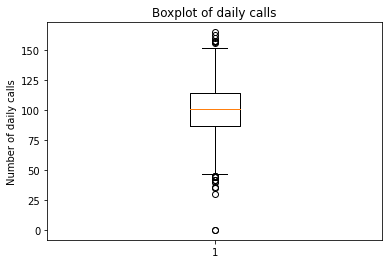

In [49]:
#We can also use boxplot to see the distribution

plt.boxplot(database["Day Calls"])
plt.ylabel("Number of daily calls")
plt.title("Boxplot of daily calls")

#Remember that the Inter Quartil Range is:
database["Day Calls"].quantile(.75)-database["Day Calls"].quantile(0.25)
#And this number is used to define which number is an outlier
#Outlier is a number 1.5IQR from 75% quantile or of 25% quantile